This file covers the first attempt at time-shifting Pioneer data. Based on our results here, we made the decision that we needed to start pulling data when the Pioneer was closer to the Earth as a baseline for the time shift, and then update the time-shift on a monthly basis.

<Figure size 432x288 with 0 Axes>

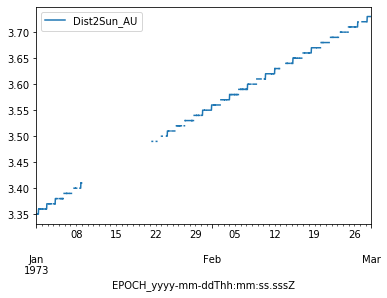

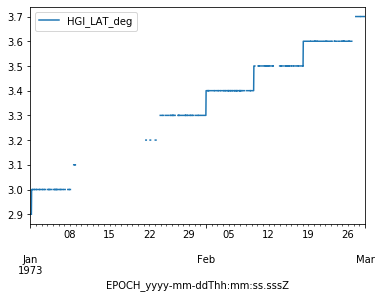

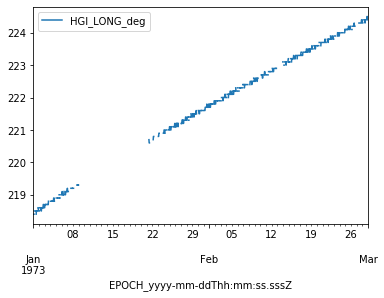

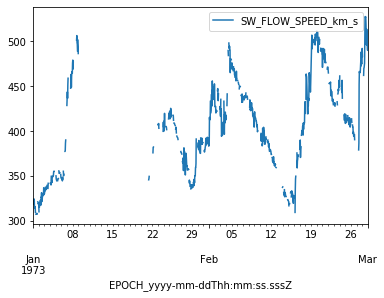

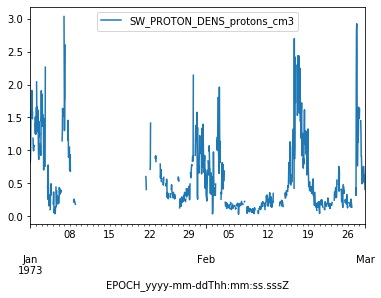

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 01/01/1973 to 03/01/1973")

df = pd.read_csv('csv files/PioneerSWandPos.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.SW_PROTON_DENS_protons_cm3 != -1.0E+31]
df = df[df.SW_FLOW_SPEED_km_s != -1.0E+31]

df = df.resample('H', on = 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='Dist2Sun_AU')
df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='HGI_LAT_deg')
df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='HGI_LONG_deg')
df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='SW_FLOW_SPEED_km_s')
df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='SW_PROTON_DENS_protons_cm3')


OMNI_HGI_LAT_deg  OMNI_HGI_LON_deg  OMNI_speed_km_s  OMNI_density_n_cc
count       1506.000000       1506.000000      1506.000000        1506.000000
mean          -5.540438         55.962218       490.728420           7.334595
std            1.696854         23.210612       116.179389           5.582781
min           -7.300000         12.400000       305.000000           1.400000
25%           -7.000000         38.000000       400.000000           3.900000
50%           -6.100000         56.950000       468.000000           5.600000
75%           -4.500000         76.300000       556.000000           9.100000
max           -1.600000         93.600000       776.000000          54.800000

<Figure size 432x288 with 0 Axes>

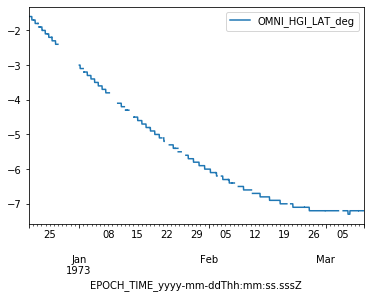

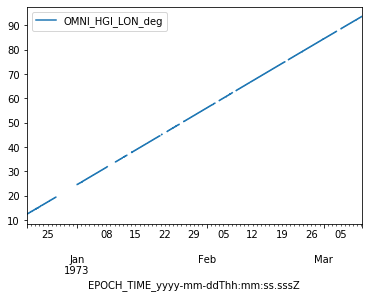

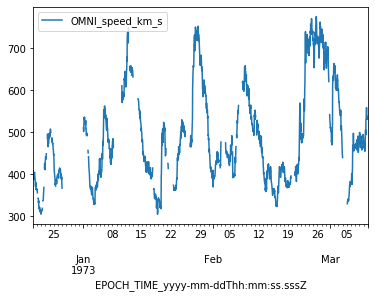

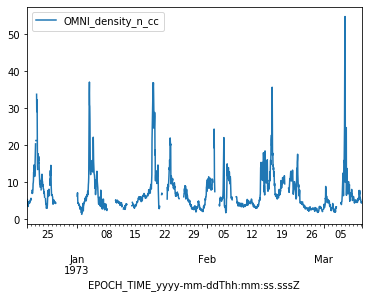

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From OMNI 12/20/1972 to 03/10/1973")

df = pd.read_csv('csv files/Omni4Pioneer1.csv')
df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.OMNI_density_n_cc != -1.0E+31]
df = df[df.OMNI_speed_km_s != -1.0E+31]

df = df.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_HGI_LAT_deg')
df.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_HGI_LON_deg')
df.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_speed_km_s')
df.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_density_n_cc')

df.describe()


C:\Users\Ian\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


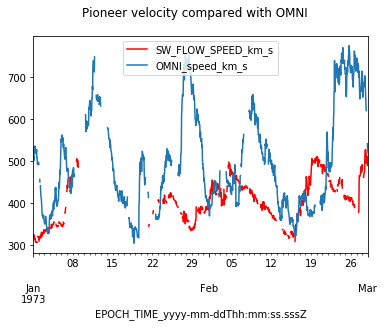

In [14]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Pioneer velocity compared with OMNI")

df = pd.read_csv('csv files/PioneerSWandPos.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.SW_PROTON_DENS_protons_cm3 != -1.0E+31]
df = df[df.SW_FLOW_SPEED_km_s != -1.0E+31]

df = df.resample('H', on = 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df2 = pd.read_csv('csv files/Omni4Pioneer1.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
df2 = df2[df2['OMNI_density_n_cc'] != -1.0E+31]
df2 = df2[df2['OMNI_speed_km_s'] != -1.0E+31]

df2 = df2.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()


ax = plt.gca()
ay = plt.gca()
df.plot(kind='line', x='EPOCH_yyyy-mm-ddThh:mm:ss.sssZ', y='SW_FLOW_SPEED_km_s', color='red', ax=ax)
df2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_speed_km_s', ax=ax)
ax.set_xlim([datetime.date(1973, 1, 1), datetime.date(1973, 3, 1)])

plt.show()

OMNI_HGI_LAT_deg  OMNI_HGI_LON_deg  OMNI_speed_km_s  OMNI_density_n_cc  \
count        611.000000        611.000000       611.000000         611.000000   
mean          -5.570049         52.706710       468.669394           7.824223   
std            1.372459         16.018618        99.341267           5.367556   
min           -7.000000         15.300000       305.000000           1.800000   
25%           -6.600000         43.300000       395.000000           4.100000   
50%           -5.900000         54.400000       447.000000           6.500000   
75%           -5.000000         65.750000       514.500000           9.700000   
max           -1.900000         75.000000       751.000000          36.900000   

       Dist2Sun_AU  HGI_LAT_deg  HGI_LONG_deg  SW_FLOW_SPEED_km_s  \
count   611.000000   611.000000    611.000000          611.000000   
mean      3.591342     3.418822    222.283633          409.247463   
std       0.100313     0.189709      1.597630           52.770938   
min       3.350000     2.900000    218.400000          307.400000   
25%       3.530000     3.300000    221.400000          370.600000   
50%       3.600000     3.400000    222.500000          412.100000   
75%       3.670000     3.600000    223.600000          446.500000   
max       3.730000     3.700000    224.400000          527.400000   

       SW_PROTON_DENS_protons_cm3  Time_offset_hours  
count                  611.000000              611.0  
mean                     0.536865              218.0  
std                      0.508368                0.0  
min                      0.029300              218.0  
25%                      0.183450              218.0  
50%                      0.325700              218.0  
75%                      0.731200              218.0  
max                      2.924000              218.0

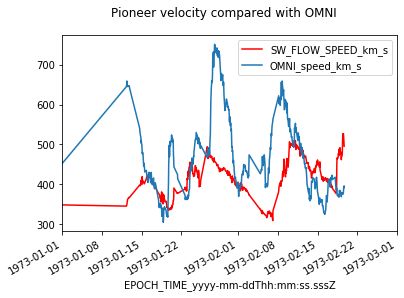

In [7]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Pioneer velocity compared with OMNI")

df = pd.read_csv('csv files/PioneerSWandPos.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.SW_PROTON_DENS_protons_cm3 != -1.0E+31]
df = df[df.SW_FLOW_SPEED_km_s != -1.0E+31]

df = df.resample('H', on = 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df2 = pd.read_csv('csv files/Omni4Pioneer1.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
df2 = df2[df2['OMNI_density_n_cc'] != -1.0E+31]
df2 = df2[df2['OMNI_speed_km_s'] != -1.0E+31]

df2 = df2.resample('H', on = 'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 218)
df['Time_offset_hours'] = 218

mF = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF = mF.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

ax = plt.gca()
ay = plt.gca()
mF.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='SW_FLOW_SPEED_km_s', color='red', ax=ax)
mF.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_speed_km_s', ax=ax)
ax.set_xlim([datetime.date(1973, 1, 1), datetime.date(1973, 3, 1)])

mF.describe()